In [1]:
from datetime import datetime

In [2]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
from dateutil import parser

In [6]:
# LOL
date = parser.parse("4th of July 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [14]:
date.strftime("%A %B %d, %Y")

'Saturday July 04, 2015'

In [28]:
# numpy has its way of storing dates that would make them efficient
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [29]:
print(np.arange(12))
date + np.arange(12)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Numpy is weird with dates, it picks a time resolution unit and then can store 2^64 max values of it. So if your resolution unit is a nanosecond, max you will store is
600 years. I saw this by instantiating the above date array with parser.parse('2015-07-04') which returned a time component and the type for date was different


In [34]:
print(np.datetime64('2015-07-04').dtype)
print(np.datetime64('2015-07-04T00:00').dtype)
print(np.datetime64('2015-07-04T00:00:00').dtype)

datetime64[D]
datetime64[m]
datetime64[s]


Pandas datetime handling combines the best of both worlds, native python and numpy. You get various operations for wrangling date time data and efficient storage and vector operations

In [35]:
import pandas as pd

In [37]:
date = pd.to_datetime("4th of July 2015")
date

Timestamp('2015-07-04 00:00:00')

In [38]:
date.strftime("%A %B %d, %Y")

'Saturday July 04, 2015'

In [39]:
date + pd.to_timedelta(np.arange(12), unit='D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [41]:
deltaIndex = pd.to_timedelta(np.arange(12), unit='D')

In [42]:
deltaIndex.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0
5,5,0,0,0,0,0,0
6,6,0,0,0,0,0,0
7,7,0,0,0,0,0,0
8,8,0,0,0,0,0,0
9,9,0,0,0,0,0,0


In [46]:
deltaIndex[2]

Timedelta('2 days 00:00:00')

In [48]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [49]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [53]:
# now this is sweet
data.loc["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

In [55]:
# this is insane....
dates = pd.to_datetime([
    datetime(2015, 7, 3), '4th of July, 2015',
    '2015-Jul-6', '07-07-2015', '20150708',    
])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [59]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [60]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

date_range(), period_range() .... these seem very useful!

In [70]:
pd.date_range('2015-01-01', '2015-12-31', freq='M' )
# pd.date_range('2015-01-01', freq='M', periods=5 )
# pd.date_range('2015-01-01', '2015-01-31', freq='B' )  <--- check this out, business days frequency!

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [71]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [73]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [75]:
# string format frequences (e.g. 2H30T) can be
from pandas.tseries.offsets import BDay
pd.date_range(datetime.today(), periods=5, freq=BDay(2))

DatetimeIndex(['2022-05-27 10:49:50.195175', '2022-05-31 10:49:50.195175',
               '2022-06-02 10:49:50.195175', '2022-06-06 10:49:50.195175',
               '2022-06-08 10:49:50.195175'],
              dtype='datetime64[ns]', freq='2B')

## WOW --- Yahoo Finance access for stock prices???

In [148]:
from pandas_datareader import data

In [150]:
goog = data.DataReader('GOOG', start='2016', end='2022', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971


In [105]:
goog = goog['Close']

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()
seaborn.set(rc={'figure.figsize':(20,10)})

<AxesSubplot:xlabel='Date'>

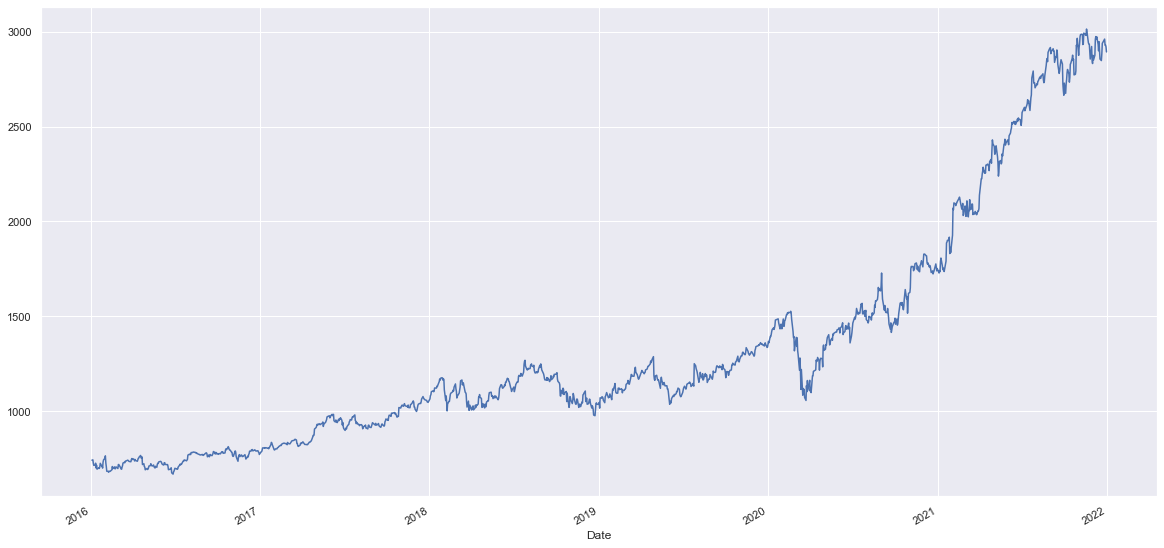

In [107]:
goog.plot()

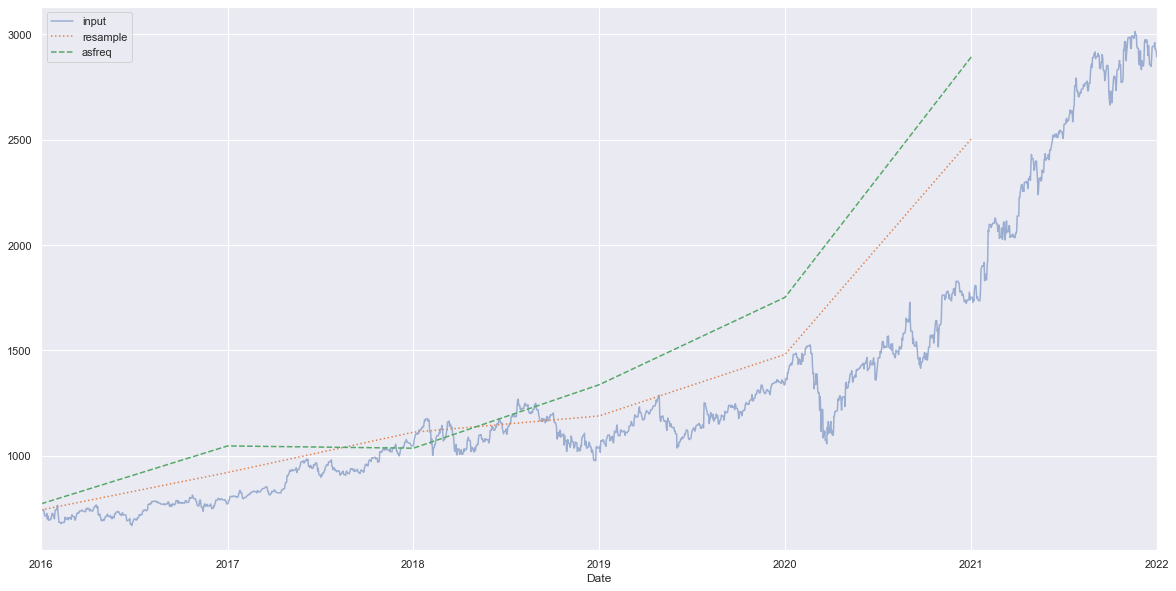

In [137]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
#goog.resample('BA').max().plot(style='--')
goog.asfreq('BA').plot(style='--')

plt.legend(['input', 'resample', 'asfreq'], loc='best')

In [100]:
goog.asfreq('BA')

Date
2004-12-31     96.035034
2005-12-30    206.655411
2006-12-29    229.380234
2007-12-31    344.448914
2008-12-31    153.250580
2009-12-31    308.832428
2010-12-31    295.875977
2011-12-30    321.744019
2012-12-31    352.369232
2013-12-31    558.262512
2014-12-31    524.958740
2015-12-31    758.880005
Freq: BA-DEC, Name: Close, dtype: float64

In [103]:
goog.resample('BA').mean()

Date
2004-12-31     75.617206
2005-12-30    138.360933
2006-12-29    204.824916
2007-12-31    268.369305
2008-12-31    231.558071
2009-12-31    219.023214
2010-12-31    266.811472
2011-12-30    283.424738
2012-12-31    320.208021
2013-12-31    440.470378
2014-12-31    559.803290
2015-12-31    602.005681
2016-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [112]:
dividents = data.DataReader('STNG', start='2016', end='2022', data_source='yahoo-dividends')
# got nothing

<AxesSubplot:>

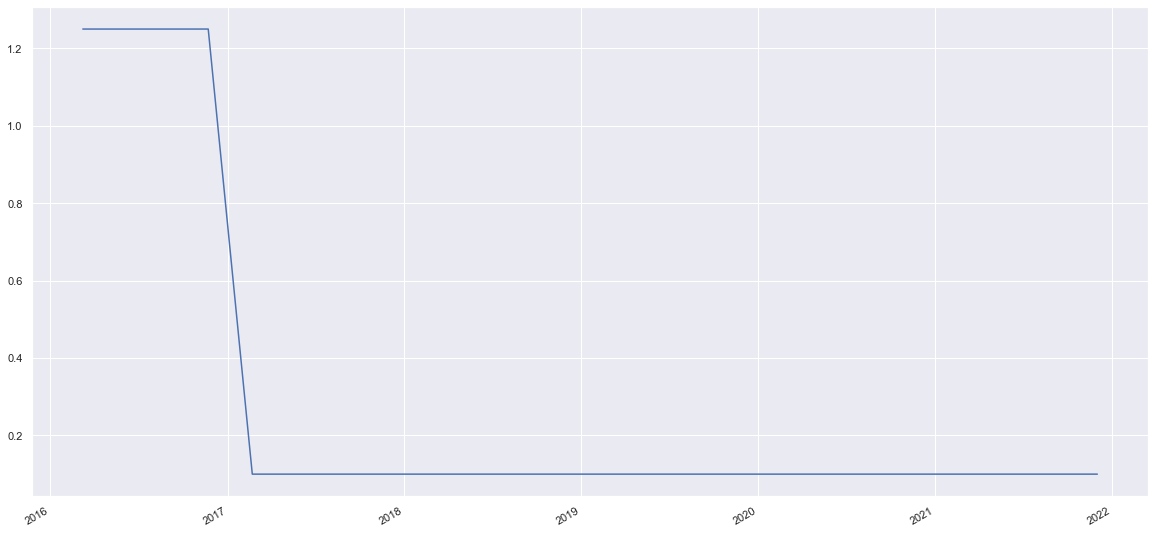

In [114]:
dividents.loc[:, "value"].plot()

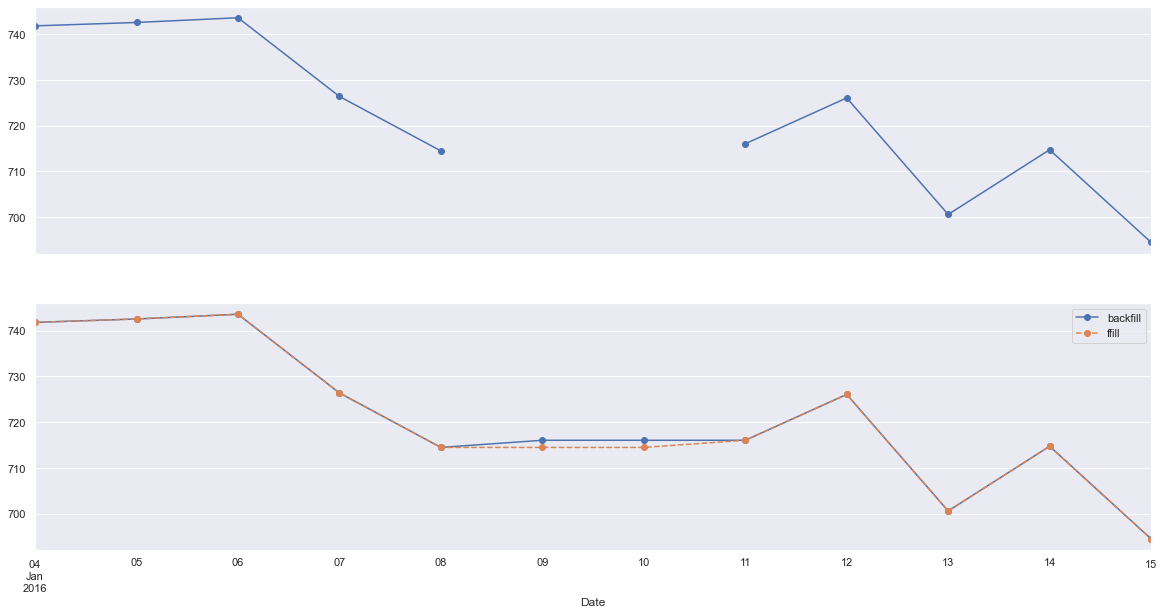

In [117]:
# more resampling goodies
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['backfill', 'ffill'], loc='best')

In [118]:
# time shifts, oh my
goog.head()

Date
2016-01-04    741.840027
2016-01-05    742.580017
2016-01-06    743.619995
2016-01-07    726.390015
2016-01-08    714.469971
Name: Close, dtype: float64

## SUPER IMPORTANT

### Shifts as a way to calculate, for example, a 30 day return on a stock

C:\Users\Laimonas\AppData\Local\Temp/ipykernel_27032/1807308211.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


<AxesSubplot:xlabel='Date'>

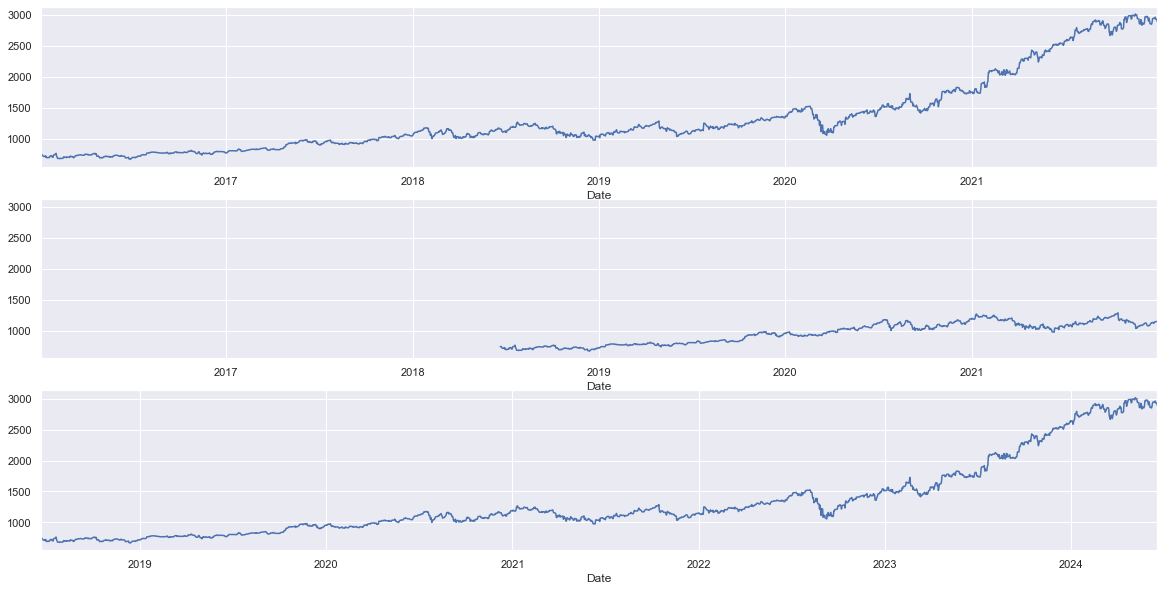

In [120]:
fix, ax = plt.subplots(3, sharey = True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])



Text(0, 0.5, '% Return on Investment')

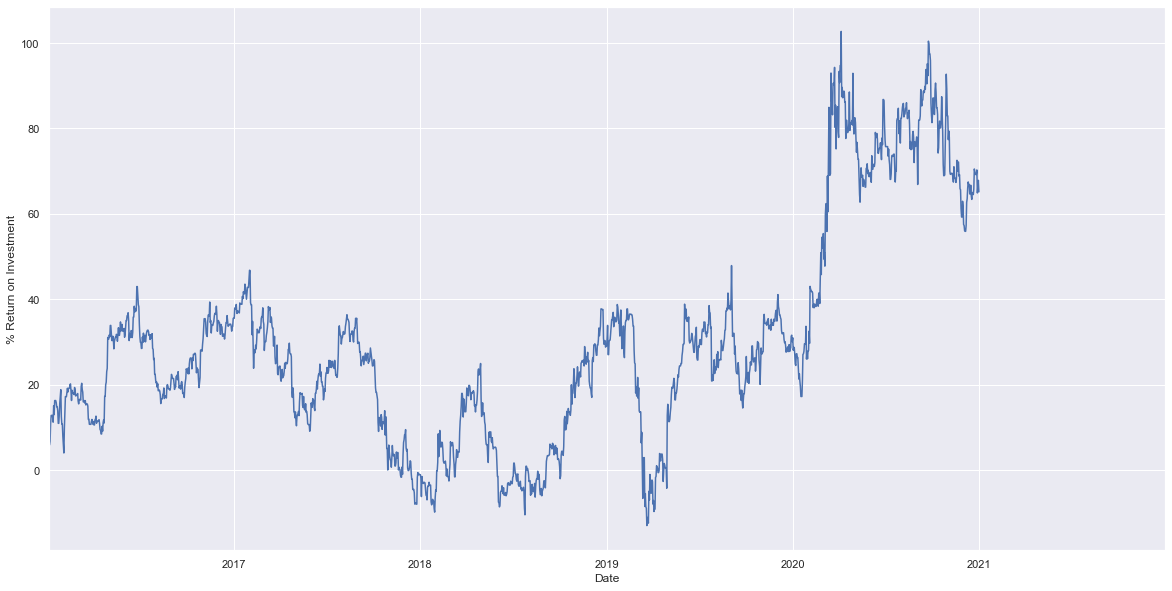

In [128]:
# not sure I understand this yet, but look at this
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

<AxesSubplot:xlabel='Date'>

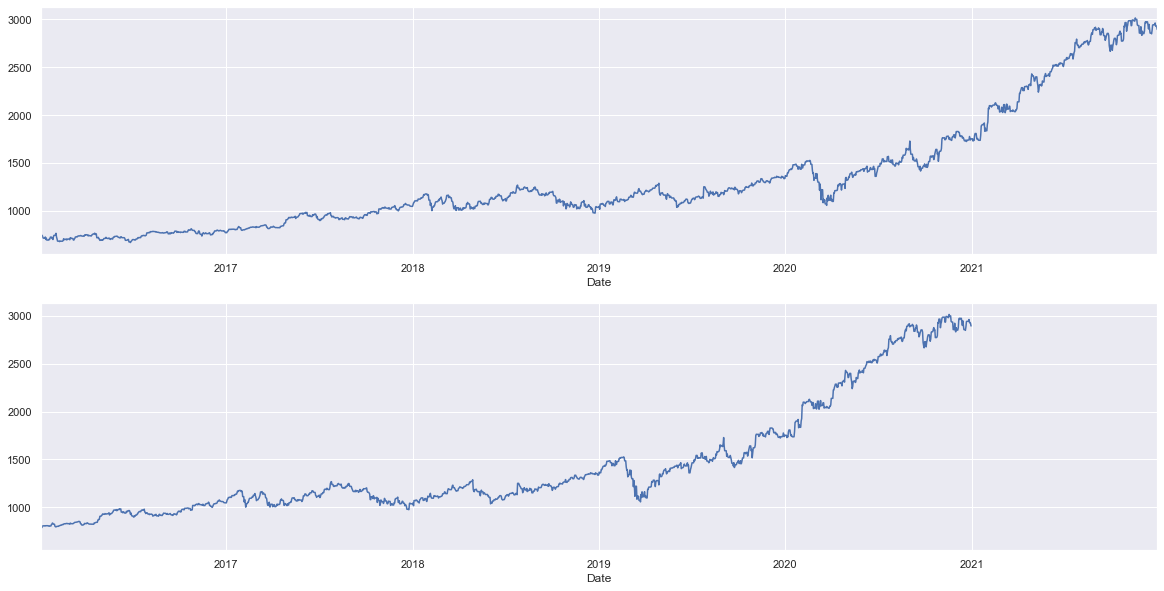

In [127]:
# this makes sense, the goog.tshift(-365) basically moved the data 365 days in one direction
fix, ax = plt.subplots(2, sharey = True)
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(-365).plot(ax=ax[1])

so goog.tshift(-365) at index 2016, has 2017 data. Then you device value at 2017 shifted with normal, you get the returnm
so, at 2016, you will have 2017 data on the shifted component, 2016 index = 2017 data / 2016 index = 2016 data and you get the return

### Rolling windows

Similar to group by, but it's a dataframe where each row is from a window of data


In [141]:
rolling = goog.rolling(window=200, center=True)
rolling

Rolling [window=200,center=True,axis=0,method=single]

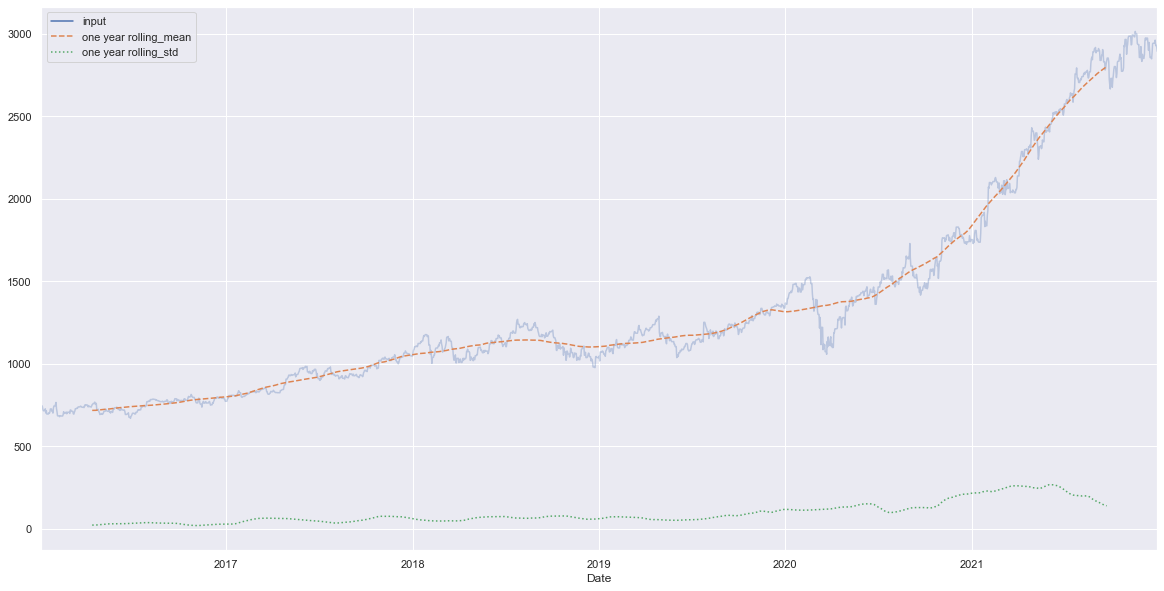

In [142]:
data = pd.DataFrame({
    'input': goog,
    'one year rolling_mean': rolling.mean(),
    'one year rolling_std': rolling.std()
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


In [134]:
goog.tail()

Date
2021-12-27    2961.280029
2021-12-28    2928.959961
2021-12-29    2930.090088
2021-12-30    2920.050049
2021-12-31    2893.590088
Freq: D, Name: Close, dtype: float64

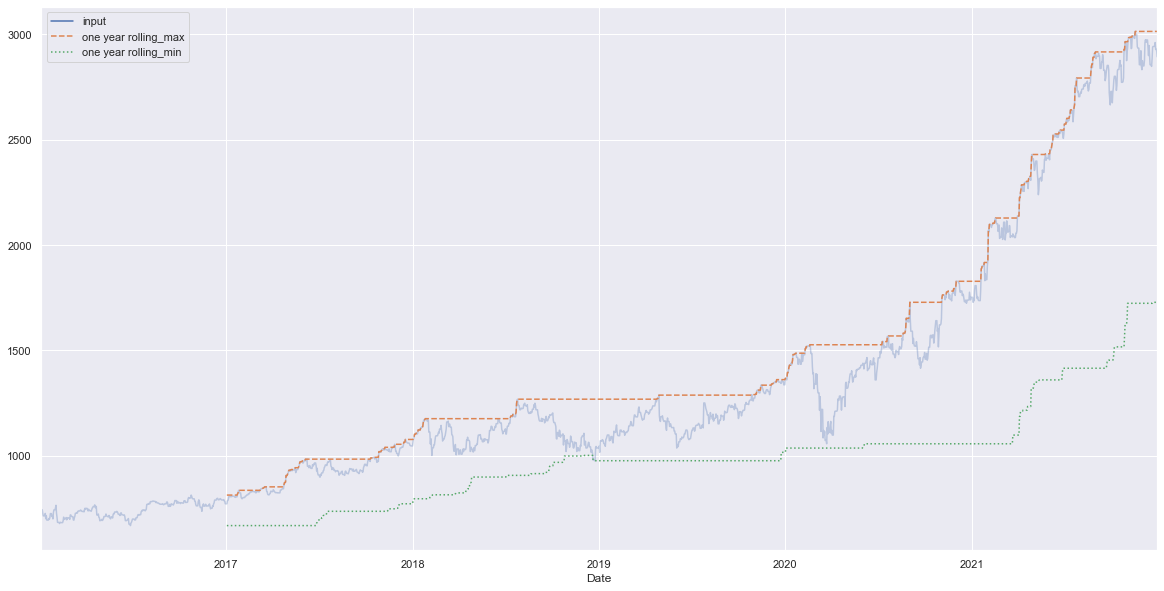

In [146]:
# instead of centering, don't center and then do max -- you will get the max lines
rolling = goog.rolling(window=365, center=False)
data = pd.DataFrame({
    'input': goog,
    'one year rolling_max': rolling.max(),
    'one year rolling_min': rolling.min()
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


In [155]:
from pandas_datareader import data as datareader

def fetch_stock_data_and_visualize(ticker, start, end):
    print("fetching stock data")
    data = datareader.DataReader(ticker, start=start, end=end, data_source='yahoo')
    data = data['Close']
    
    
    rolling = data.rolling(window=365, center=False)
    data = pd.DataFrame({
        'input': data,
        'one year rolling_max': rolling.max(),
        'one year rolling_min': rolling.min()
    })
    ax = data.plot(style=['-', '--', ':'])
    ax.lines[0].set_alpha(0.3)

fetching stock data


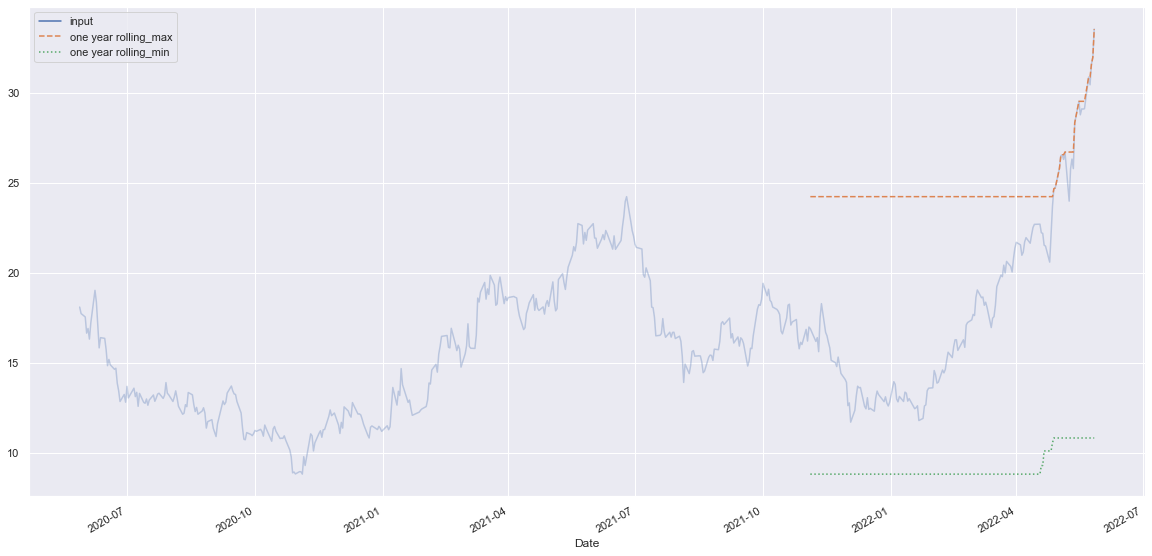

In [159]:
from datetime import timedelta

today = datetime.today().strftime('%Y-%m-%d')
two_years_ago = (datetime.today() - timedelta(days=365*2)).strftime('%Y-%m-%d')

fetch_stock_data_and_visualize("STNG", two_years_ago, today)

In [160]:
bicycle_data = pd.read_csv('bicycle_counter.csv')
bicycle_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [172]:
bicycle_data.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [173]:
bicycle_data["Date"] = pd.to_datetime(bicycle_data["Date"])

In [176]:
bicycle_data.describe(datetime_is_numeric=True)

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,150158,150135.000000,150135.000000,150134.000000
mean,2017-02-04 19:05:26.080528128,109.506771,49.640237,59.866932
min,2012-10-03 00:00:00,0.000000,0.000000,0.000000
25%,2014-11-24 01:15:00,14.000000,6.000000,7.000000
50%,2017-01-14 03:00:00,59.000000,27.000000,30.000000
75%,2019-03-07 04:45:00,144.000000,67.000000,74.000000
max,2022-04-30 23:00:00,1097.000000,698.000000,850.000000
std,NaN,139.596725,64.238043,86.696586


In [178]:
bicycle_data.columns = ['Date', 'Total', 'East', 'West']

In [179]:
bicycle_data.head()

,Date,Total,East,West
0,2019-11-01 00:00:00,12.0,7.0,5.0
1,2019-11-01 01:00:00,7.0,0.0,7.0
2,2019-11-01 02:00:00,1.0,0.0,1.0
3,2019-11-01 03:00:00,6.0,6.0,0.0
4,2019-11-01 04:00:00,6.0,5.0,1.0


In [183]:
len(bicycle_data[bicycle_data.isna().any(axis=1)])

24

In [184]:
# meh, let's drop it
bicycle_data = bicycle_data.dropna()

In [185]:
bicycle_data.describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [193]:
%matplotlib inline
import seaborn; seaborn.set();
seaborn.set(rc={'figure.figsize':(20,10)})

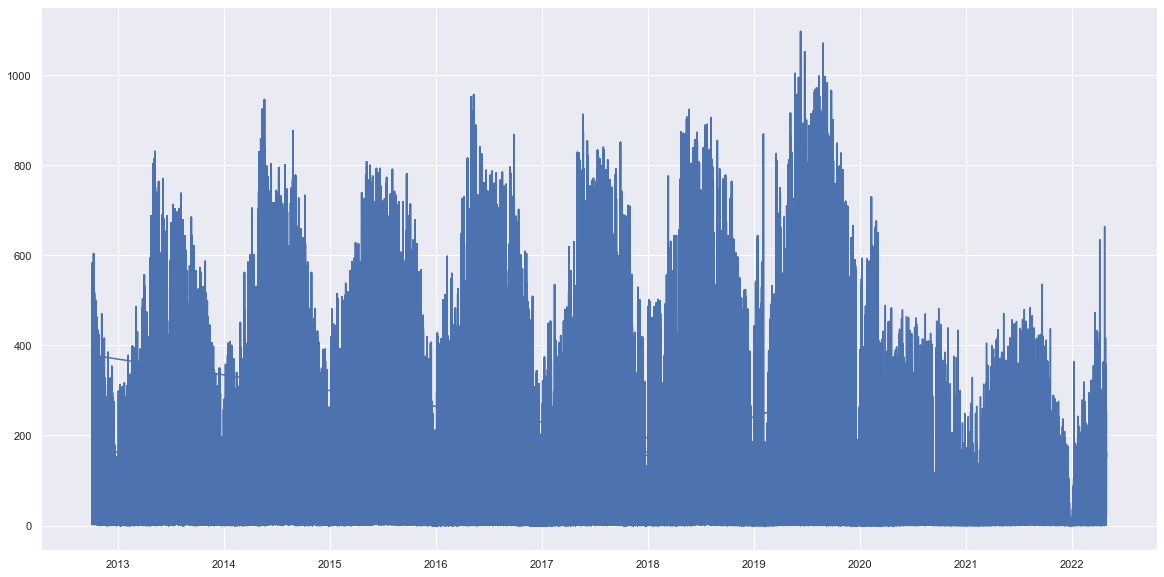

In [195]:
plt.plot(bicycle_data['Total'])

Text(0, 0.5, 'Weekly Bicycle Count')

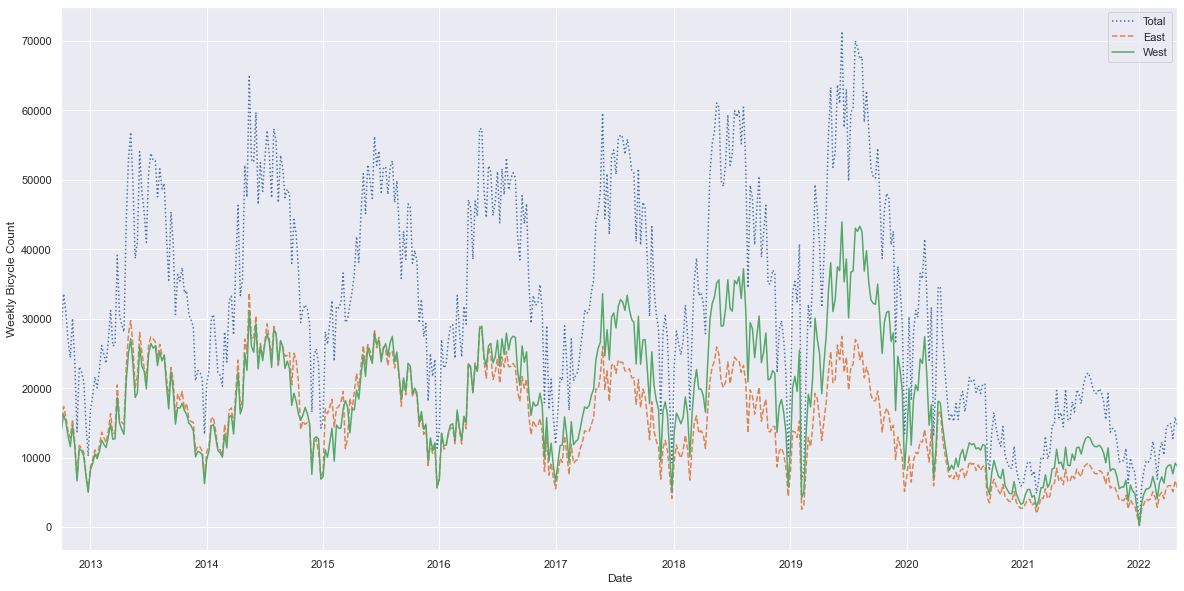

In [197]:
weekly = bicycle_data.resample('W').sum()
weekly.head()
weekly.plot( style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

Text(0, 0.5, 'Daily Bicycle Count')

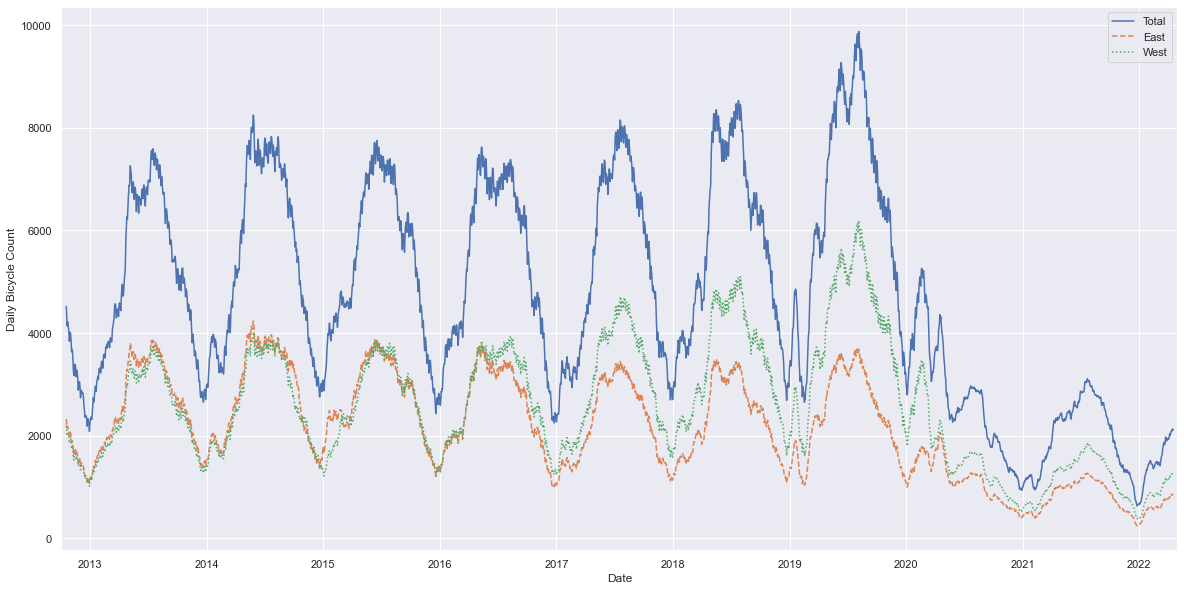

In [204]:
# rolling mean
daily = bicycle_data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=['-', '--', ':'])
plt.ylabel('Daily Bicycle Count')

<AxesSubplot:xlabel='Date'>

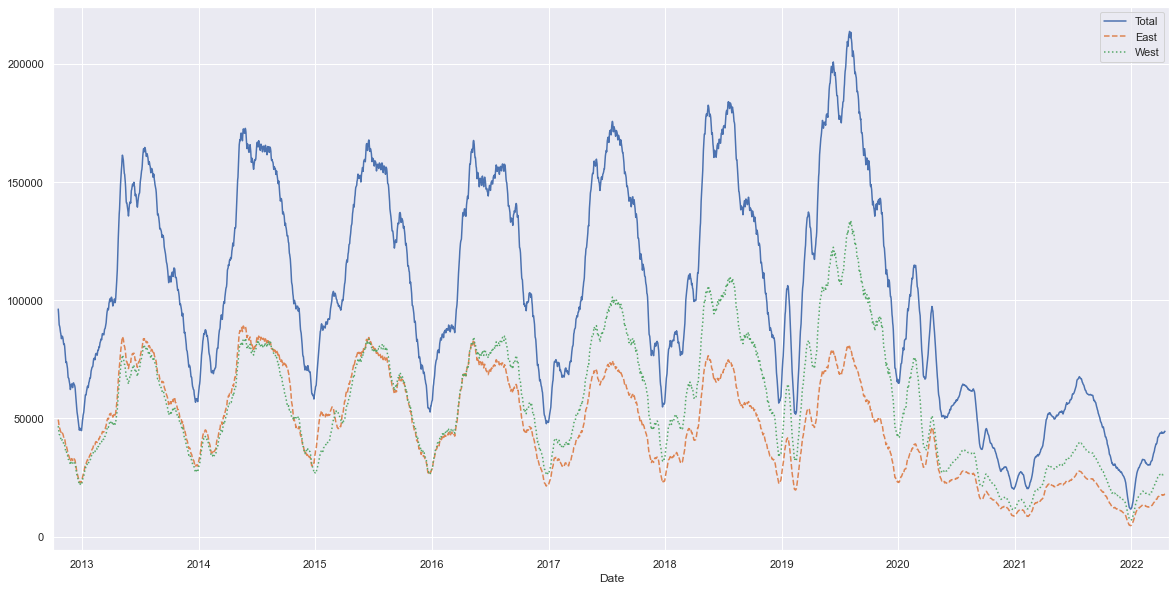

In [203]:
# smoother rolling window
daily.rolling(30, center=True, win_type='gaussian').sum(std=10).plot(style=['-', '--', ':'])

ConversionError: Failed to convert value(s) to axis units: ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

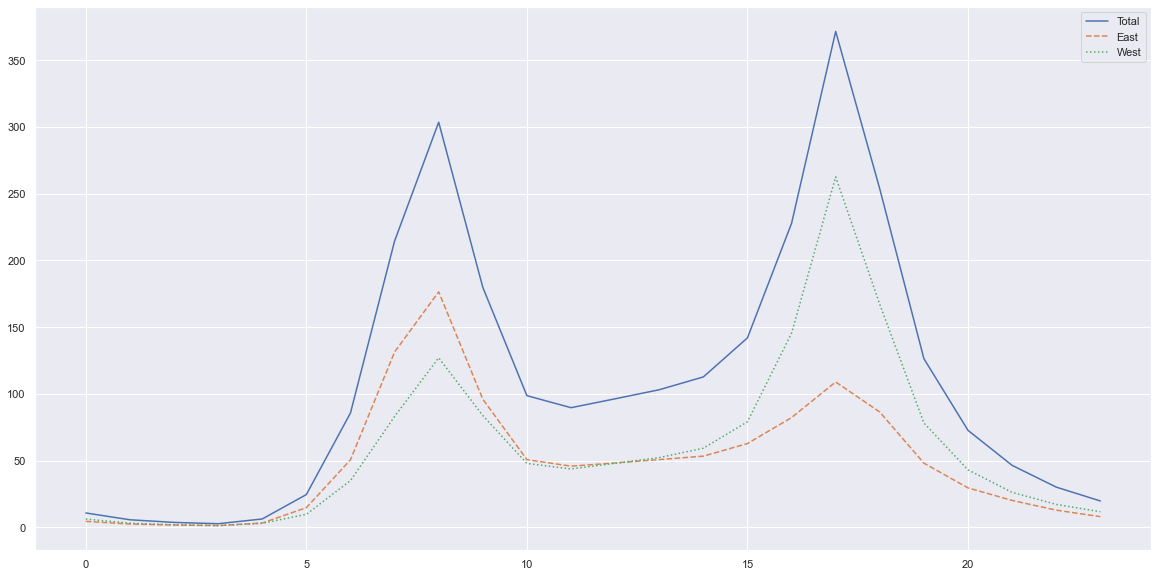

In [207]:
# look at the time of the day aggregation
by_time = bicycle_data.groupby(bicycle_data.index.hour).mean()
hourly_ticks = [str(hour) + ':00' for hour in range(24)]
by_time.plot(xticks=hourly_ticks, style=['-', '--', ':'])

<AxesSubplot:>

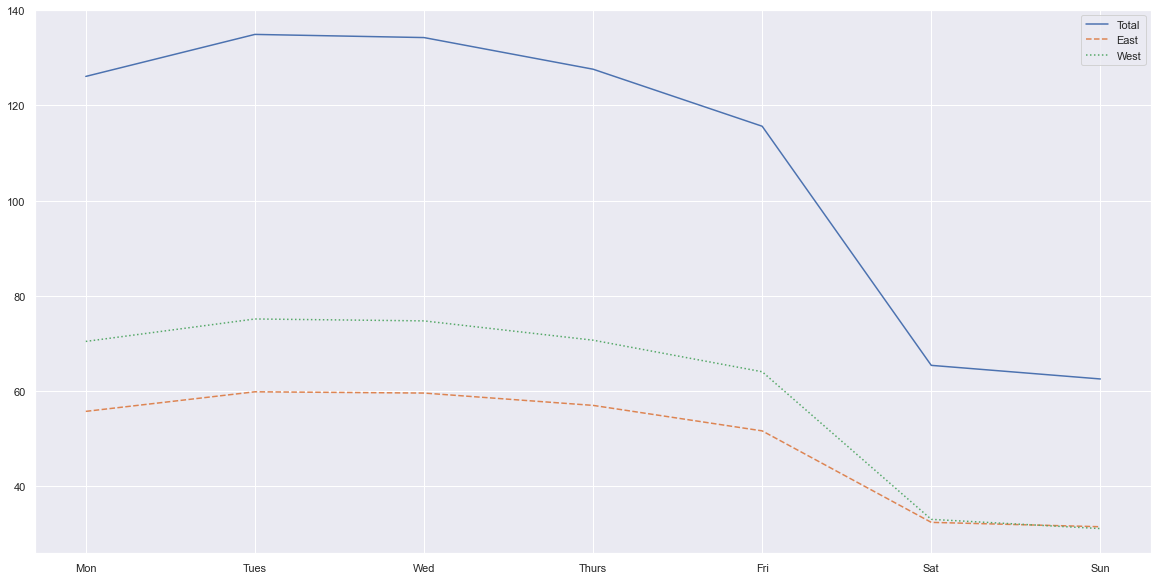

In [208]:
by_weekday = bicycle_data.groupby(bicycle_data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', '--', ':'])

In [209]:
weekend = np.where(bicycle_data.index.dayofweek < 5, 'Weekday', 'Weekend')
by_time = bicycle_data.groupby([weekend, bicycle_data.index.time]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

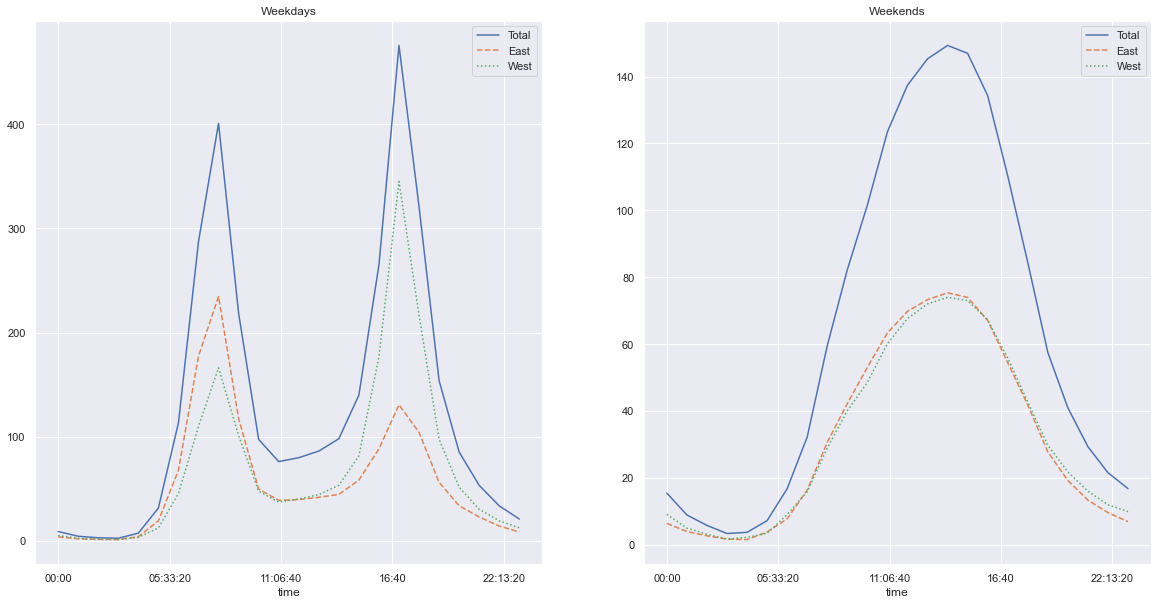

In [210]:
fig, ax = plt.subplots(1, 2)
by_time.loc["Weekday"].plot(ax=ax[0], title="Weekdays", style=['-', '--', ':'])
by_time.loc["Weekend"].plot(ax=ax[1], title="Weekends", style=['-', '--', ':'])